<a href="https://colab.research.google.com/github/sharmila2704/ML/blob/main/Retail_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
feature_df=pd.read_csv("/content/drive/MyDrive/Features data set.csv")
sales_df=pd.read_csv("/content/drive/MyDrive/sales data-set.csv")
store_df=pd.read_csv("/content/drive/MyDrive/stores data-set.csv")

In [4]:
feature_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [6]:
store_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
feature_df.shape,sales_df.shape,store_df.shape

((8190, 12), (421570, 5), (45, 3))

In [8]:
# change date format
feature_df['Date'] = pd.to_datetime(feature_df['Date'], format = 'mixed')
sales_df['Date'] = pd.to_datetime(sales_df['Date'], format = 'mixed')

In [9]:
# Merge different datasets
df = pd.merge(sales_df, feature_df, how = 'left', on = ['Store','Date','IsHoliday']) # merging sales and features by left since there are more rows for sales
df_new = pd.merge(df, store_df, how = 'left', on = 'Store') #merge df and df_stores by left to keep all the columns and rows
df_new = df_new.fillna(0)

In [10]:
df_new.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,1,2010-12-02,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315
4,1,1,2010-05-03,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315
5,1,1,2010-12-03,21043.39,False,57.79,2.667,0.0,0.0,0.0,0.0,0.0,211.380643,8.106,A,151315
6,1,1,2010-03-19,22136.64,False,54.58,2.720,0.0,0.0,0.0,0.0,0.0,211.215635,8.106,A,151315
7,1,1,2010-03-26,26229.21,False,51.45,2.732,0.0,0.0,0.0,0.0,0.0,211.018042,8.106,A,151315
8,1,1,2010-02-04,57258.43,False,62.27,2.719,0.0,0.0,0.0,0.0,0.0,210.820450,7.808,A,151315
9,1,1,2010-09-04,42960.91,False,65.86,2.770,0.0,0.0,0.0,0.0,0.0,210.622857,7.808,A,151315


In [11]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

In [12]:
#seperate Numerical and Categorical Variables
cat_cols =['Store', 'Dept', 'IsHoliday', 'Type']
num_cols = df_new.columns.drop(cat_cols)
num_cols = num_cols.drop('Date') # Drop 'Date' column from numerical columns

print('Categorical Variables:')
print(cat_cols)

print('Numerical Variables:')
print(num_cols)

Categorical Variables:
['Store', 'Dept', 'IsHoliday', 'Type']
Numerical Variables:
Index(['Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size'],
      dtype='object')


<function matplotlib.pyplot.show(close=None, block=None)>

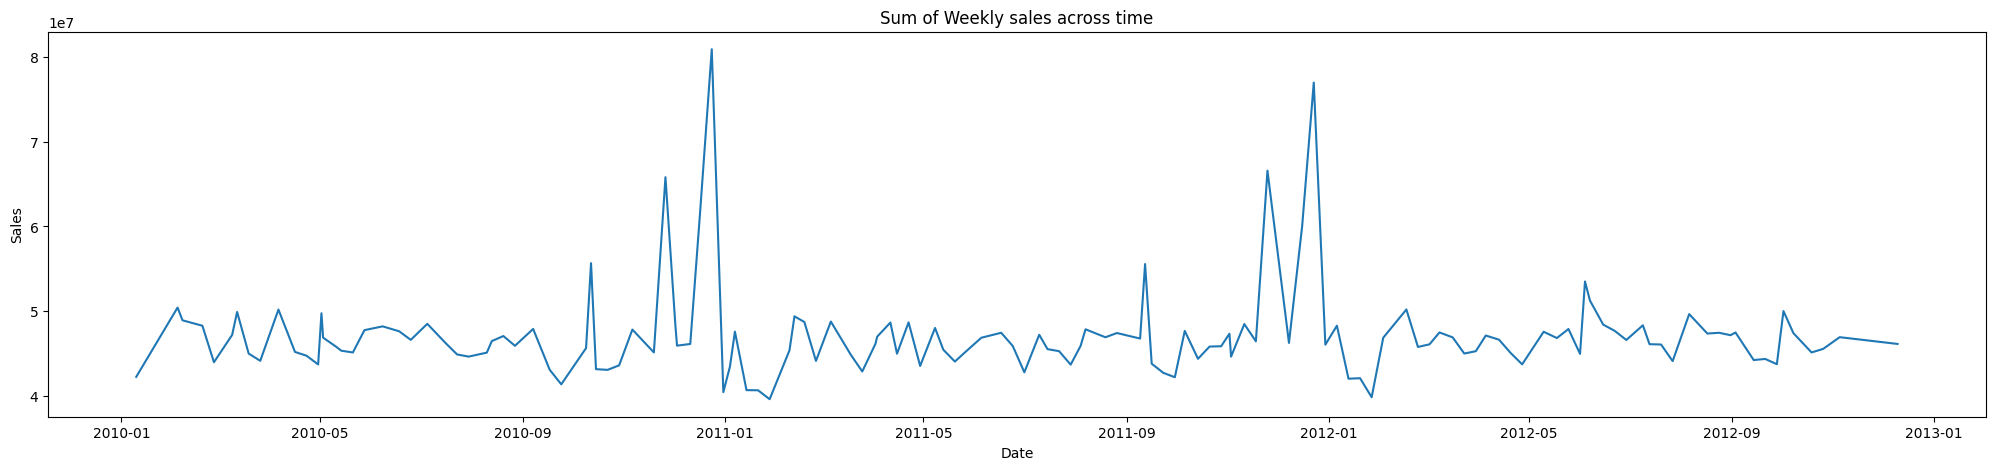

In [13]:
# Sum of sales  across time
sales_across_time = df_new.groupby(by = ['Date'], as_index = False)['Weekly_Sales'].sum()

plt.figure(figsize = (25,5))
plt.plot(sales_across_time.Date, sales_across_time.Weekly_Sales)
plt.title("Sum of Weekly sales across time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show

# Sales are generally constant, except on certain months (Nov, Dec)

/tmp/ipython-input-39989703.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = yearly_sales.index, y = yearly_sales.values, palette = 'rocket')


Text(0.5, 0, 'Years')

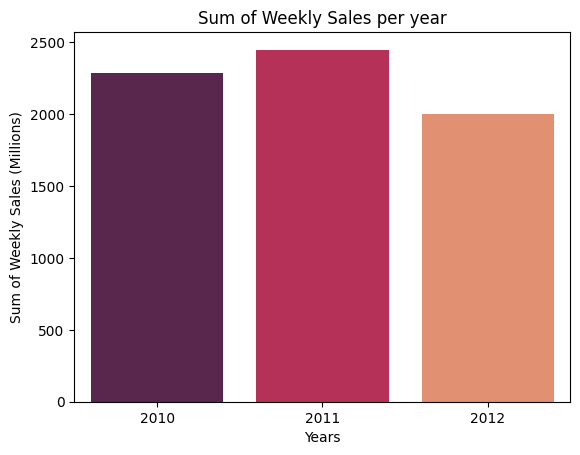

In [14]:
yearly_sales = df_new.groupby(df_new.Date.dt.year)['Weekly_Sales'].sum()/1000000
sns.barplot(x = yearly_sales.index, y = yearly_sales.values, palette = 'rocket')
plt.title("Sum of Weekly Sales per year")
plt.ylabel("Sum of Weekly Sales (Millions)")
plt.xlabel("Years")

# Sum of Weekly sales is the highest in 2011 -- look into factors that may affect the sales

/tmp/ipython-input-354207613.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = monthly_sales.index, y = monthly_sales.values, palette='flare')


Text(0.5, 1.0, 'Sum of weekly sales per month')

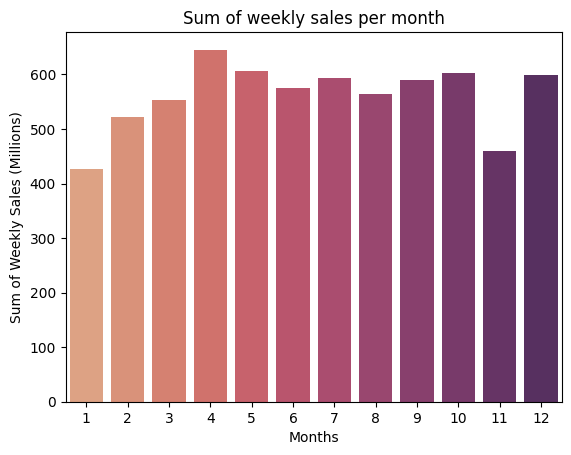

In [15]:
# Sum of weekly sales each month, across the years
monthly_sales = df_new.groupby(df_new.Date.dt.month)['Weekly_Sales'].sum()/1000000
sns.barplot(x = monthly_sales.index, y = monthly_sales.values, palette='flare')
plt.xlabel('Months')
plt.ylabel('Sum of Weekly Sales (Millions)')
plt.title("Sum of weekly sales per month")

# Sum of weekly sales is the highest in April, followed by October

In [16]:
# Further deepdive into specific dates that drives highest weekly sales
# Top 5 dates where weekly_sales are the highest
sort_sales_across_time = sales_across_time.sort_values('Weekly_Sales', ascending = False) # sort in descending order
sort_sales_across_time.head(5)

,Date,Weekly_Sales
46,2010-12-24,80931415.60
98,2011-12-23,76998241.31
95,2011-11-25,66593605.26
41,2010-11-26,65821003.24
45,2010-12-17,61820799.85


<function matplotlib.pyplot.show(close=None, block=None)>

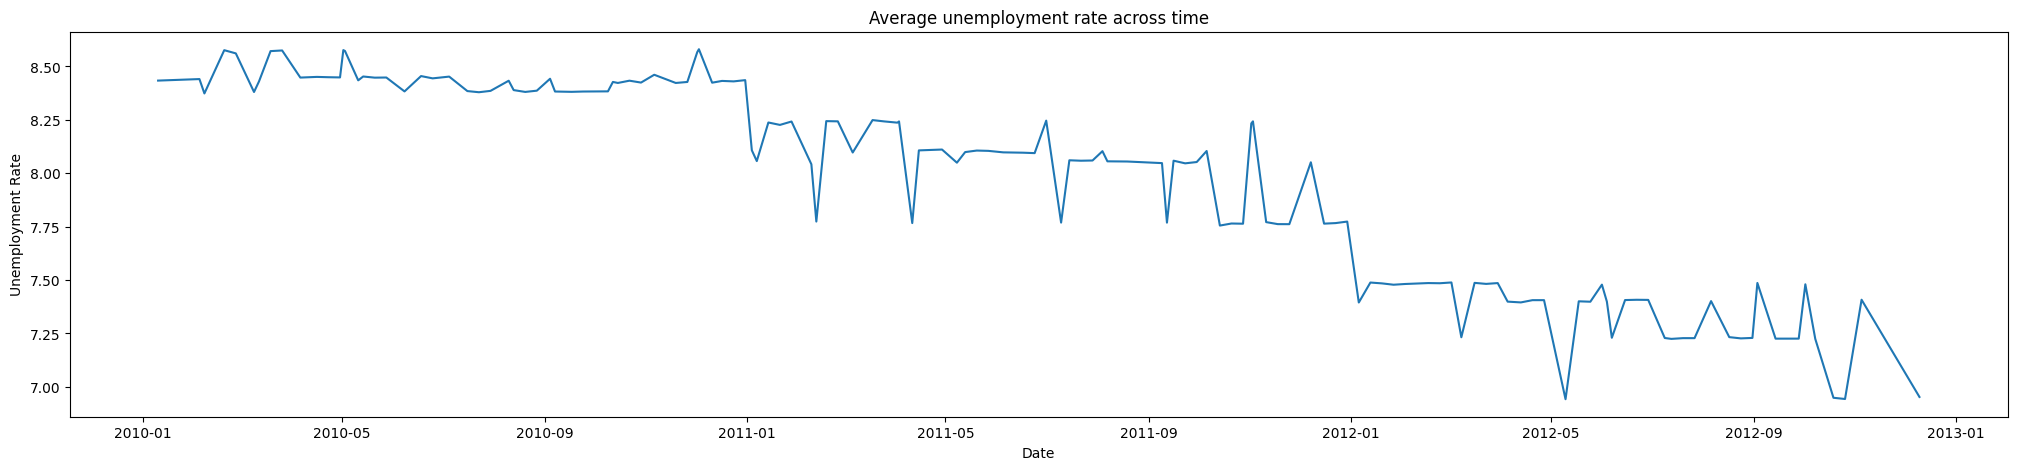

In [17]:
# Unemployment across time
unn_across_time = df_new.groupby(by = ['Date'], as_index= False)['Unemployment'].mean() # average rate of unemployment each date for all the different outlets
plt.figure(figsize = (25,5))
plt.plot(unn_across_time.Date, unn_across_time.Unemployment)
plt.xlabel("Date")
plt.ylabel("Unemployment Rate")
plt.title("Average unemployment rate across time")
plt.show

Text(0.5, 1.0, 'Average CPI across time')

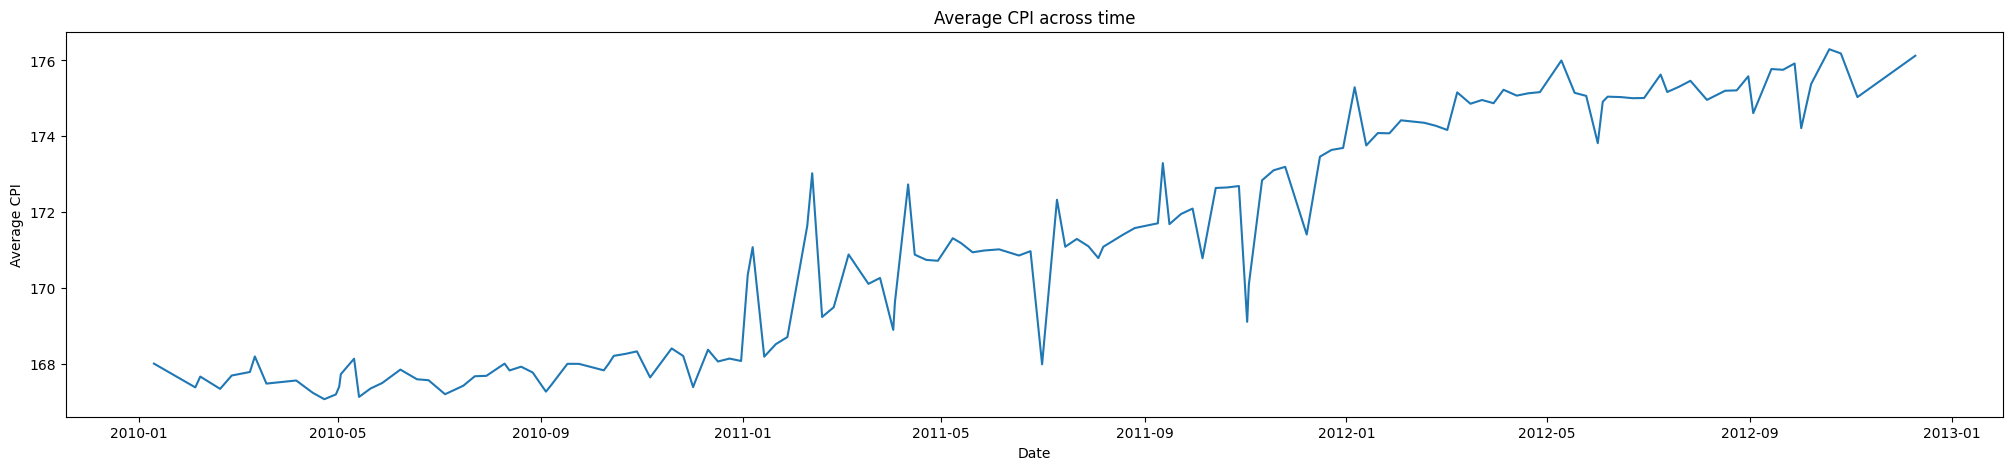

In [18]:
# CPI across time
cpi_across_time = df_new.groupby(by = ['Date'], as_index= False)['CPI'].mean()
plt.figure(figsize = (25,5))
plt.plot(cpi_across_time.Date, cpi_across_time.CPI)
plt.xlabel('Date')
plt.ylabel("Average CPI")
plt.title("Average CPI across time")
# CPI generally increases across the years

Text(0.5, 1.0, 'Average Fuel Price across time')

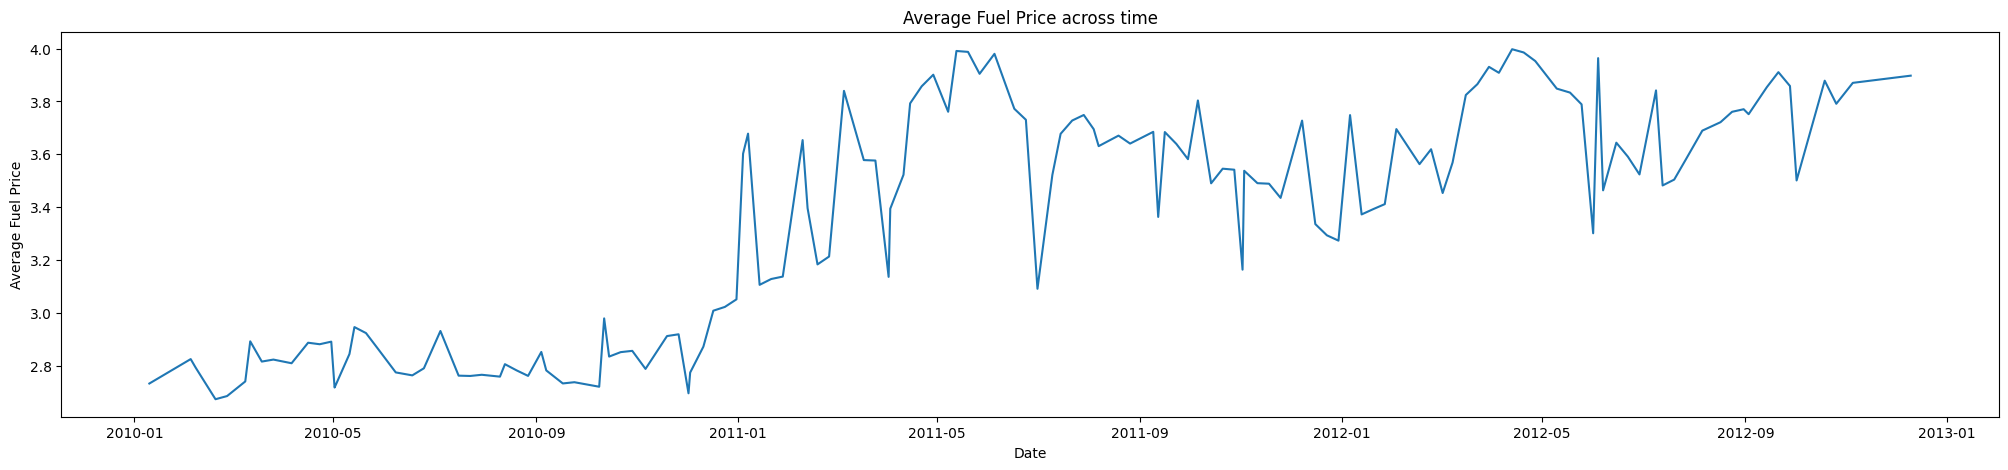

In [19]:
# Average fuel price across time
fuel_across_time = df_new.groupby(by = ['Date'], as_index= False)['Fuel_Price'].mean()
plt.figure(figsize=(25,5))
plt.plot(fuel_across_time.Date, fuel_across_time.Fuel_Price)
plt.xlabel('Date')
plt.ylabel('Average Fuel Price')
plt.title("Average Fuel Price across time")
# Average fuel price is generally increasing across the years

Text(0.5, 1.0, 'Average Temperature across time')

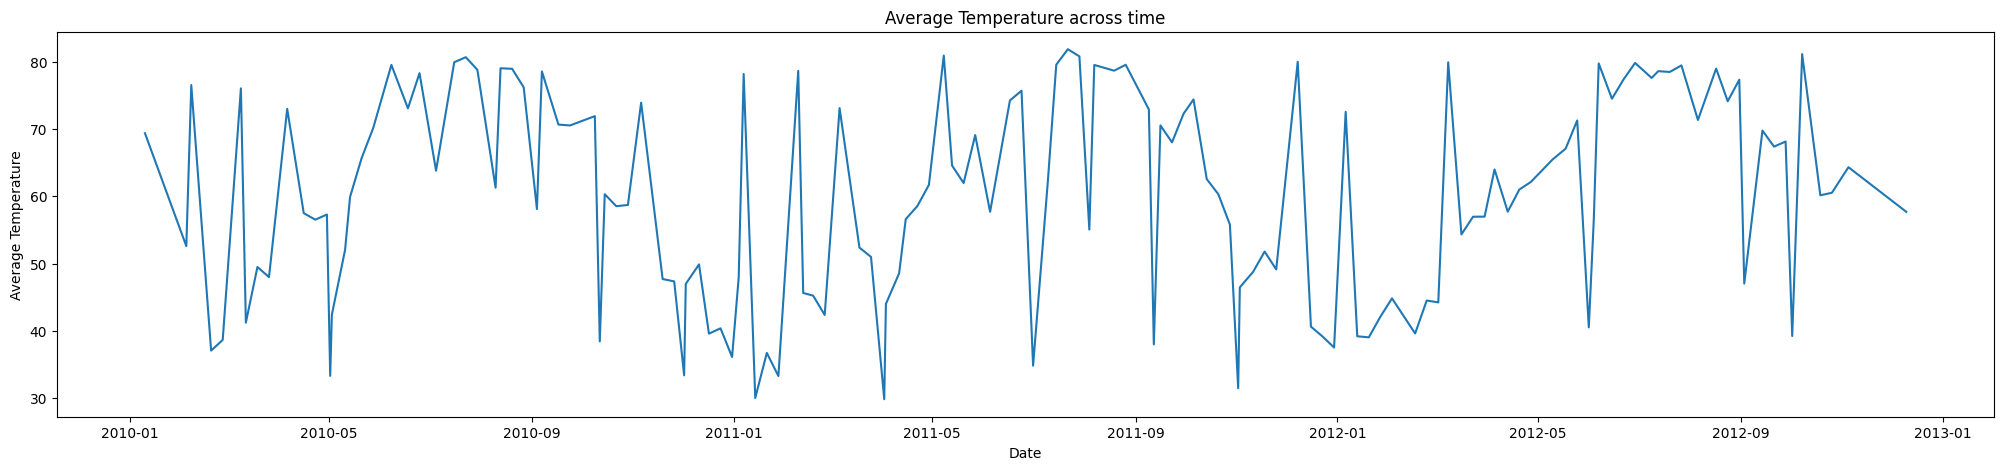

In [20]:
# Temperature  across time
temp_across_time = df_new.groupby(by = ['Date'], as_index= False)['Temperature'].mean()
plt.figure(figsize=(25,5))
plt.plot(temp_across_time.Date, temp_across_time.Temperature)
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title("Average Temperature across time")
# Average fuel price is generally increasing across the years

/tmp/ipython-input-3002647359.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = stores_sales.Store, y = stores_sales.Weekly_Sales , data = stores_sales, palette = 'rocket')


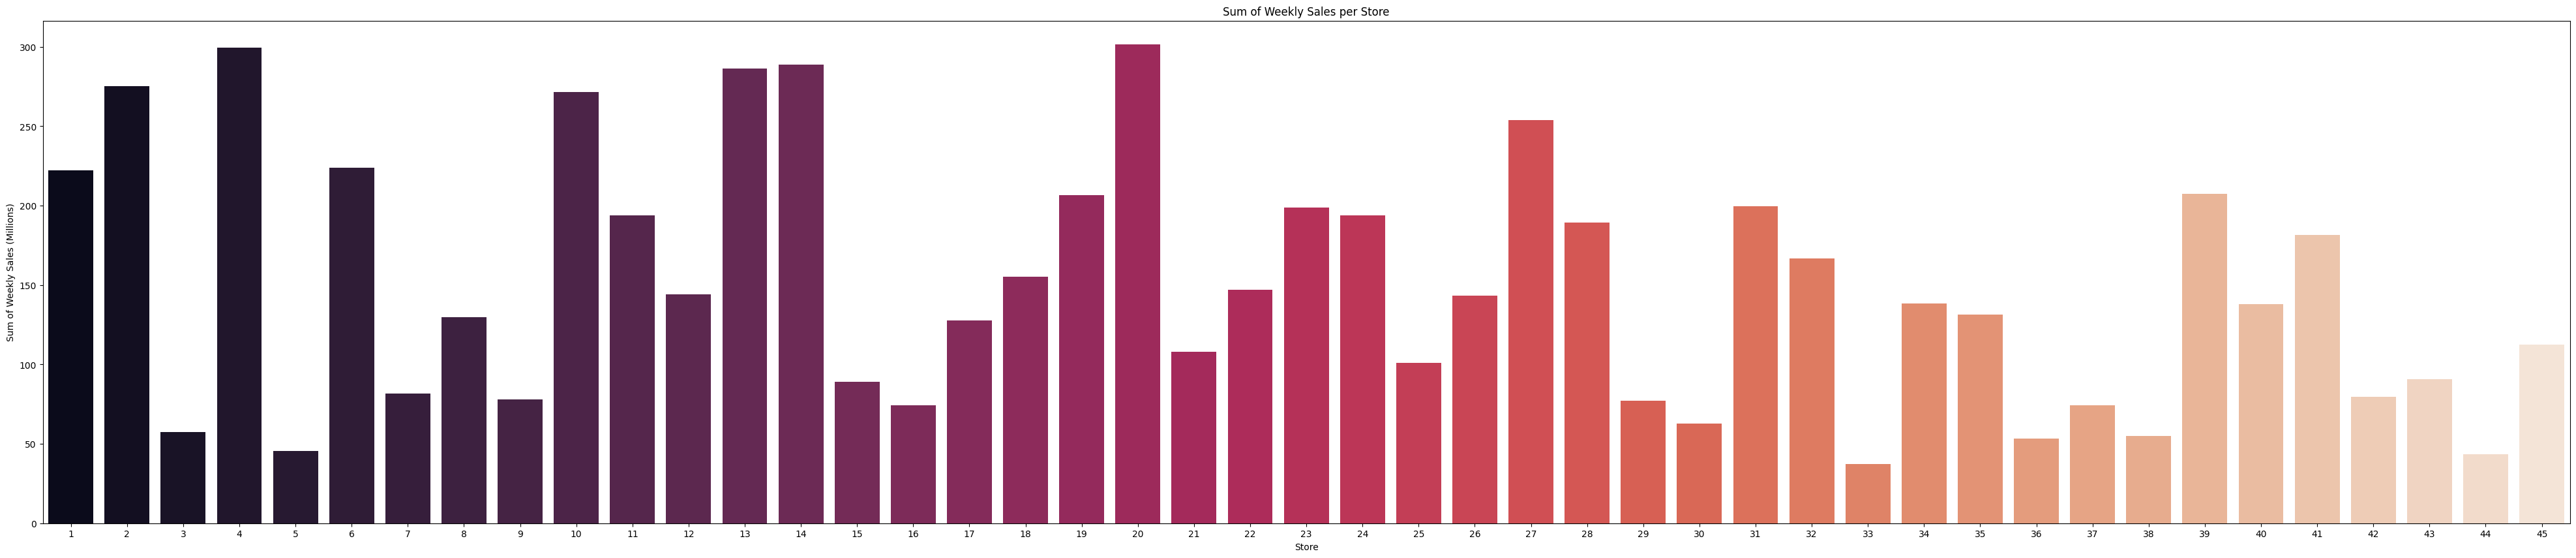

In [21]:
# Sum of weekly sales across Stores
stores_sales = df_new.groupby(by = ['Store'], as_index= False)['Weekly_Sales'].sum()
stores_sales['Weekly_Sales'] = stores_sales['Weekly_Sales']/1000000
plt.figure(figsize= (50,10))
sns.barplot(x = stores_sales.Store, y = stores_sales.Weekly_Sales , data = stores_sales, palette = 'rocket')
plt.xlabel('Store')
plt.ylabel('Sum of Weekly Sales (Millions)')
plt.title('Sum of Weekly Sales per Store')
plt.show()

# Stores 4, 14, 20 are the stores with the highest sales across time

/tmp/ipython-input-1379819349.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = type_sales.Type, y = type_sales.Weekly_Sales , data = type_sales, palette = 'rocket')


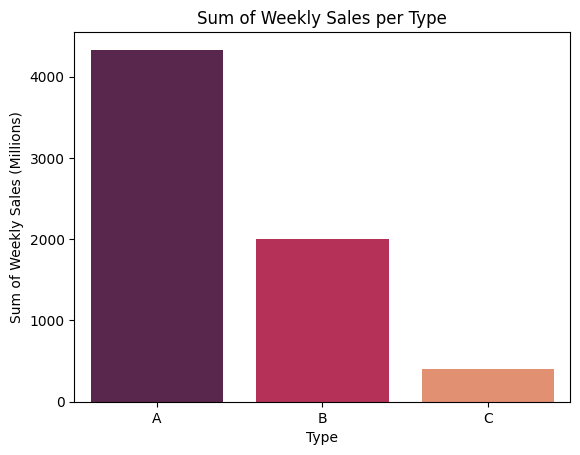

In [22]:
# Sum of weekly sales across Type
type_sales = df_new.groupby(by = ['Type'], as_index= False)['Weekly_Sales'].sum()
type_sales['Weekly_Sales'] = type_sales['Weekly_Sales']/1000000
sns.barplot(x = type_sales.Type, y = type_sales.Weekly_Sales , data = type_sales, palette = 'rocket')
plt.xlabel('Type')
plt.ylabel('Sum of Weekly Sales (Millions)')
plt.title('Sum of Weekly Sales per Type')
plt.show()

# Type A has the highest sales

/tmp/ipython-input-458359894.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = dept_sales.Dept, y = dept_sales.Weekly_Sales , data = dept_sales, palette ='rocket')


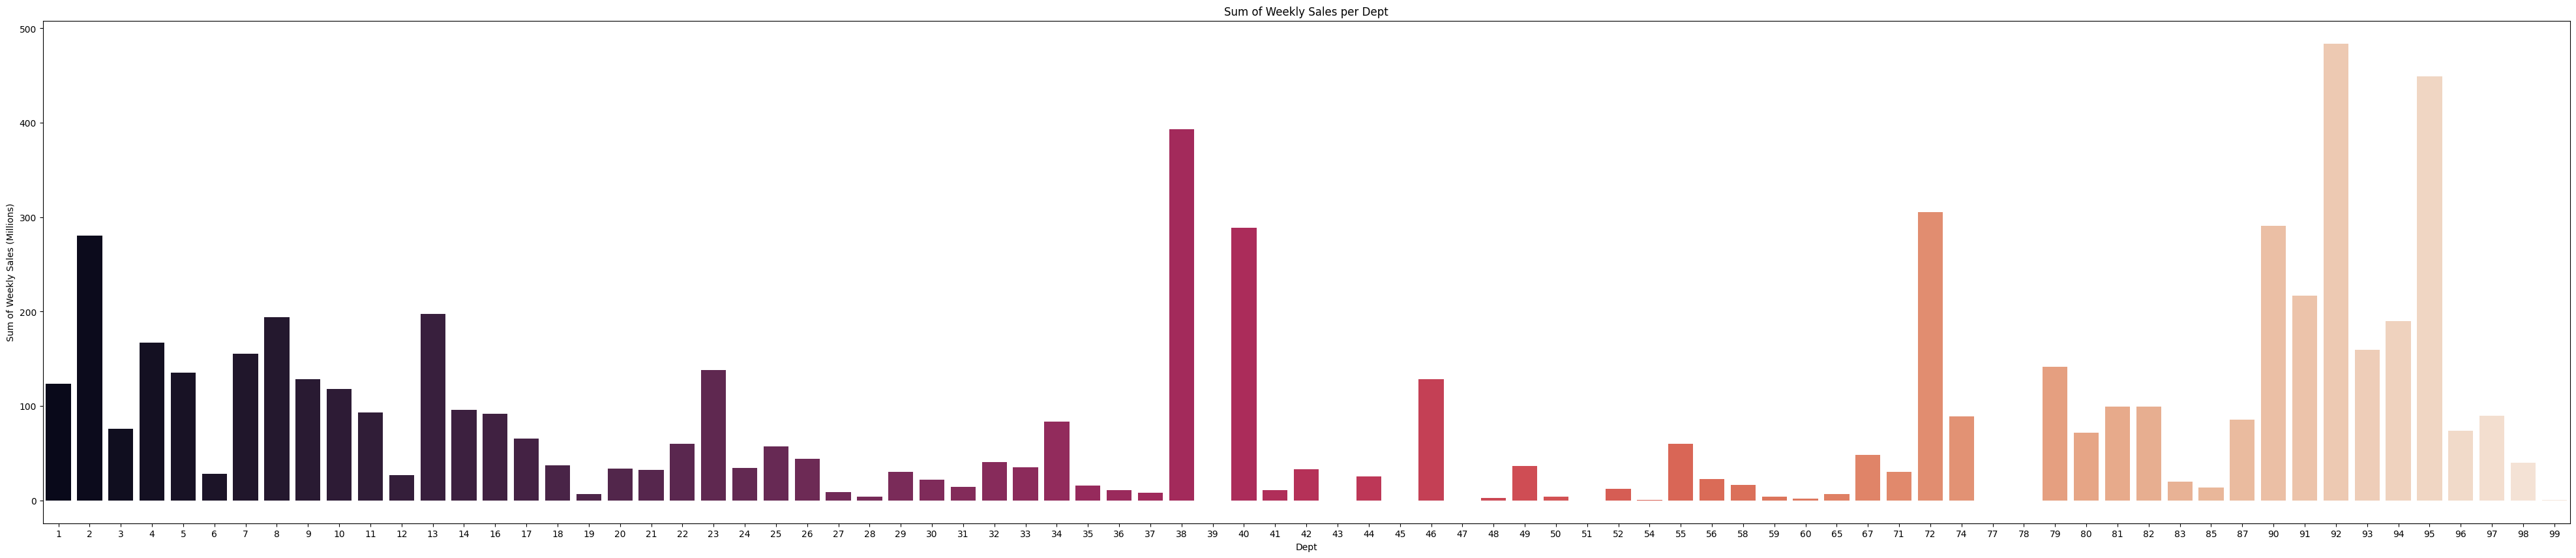

In [23]:
# Sum of weekly sales across Department
dept_sales = df_new.groupby(by = ['Dept'], as_index= False)['Weekly_Sales'].sum()
dept_sales['Weekly_Sales'] = dept_sales['Weekly_Sales']/1000000
plt.figure(figsize=(50,10))
sns.barplot(x = dept_sales.Dept, y = dept_sales.Weekly_Sales , data = dept_sales, palette ='rocket')
plt.xlabel('Dept')
plt.ylabel('Sum of Weekly Sales (Millions)')
plt.title('Sum of Weekly Sales per Dept')
plt.show()

# dept 38, 92,95 have the highest sales

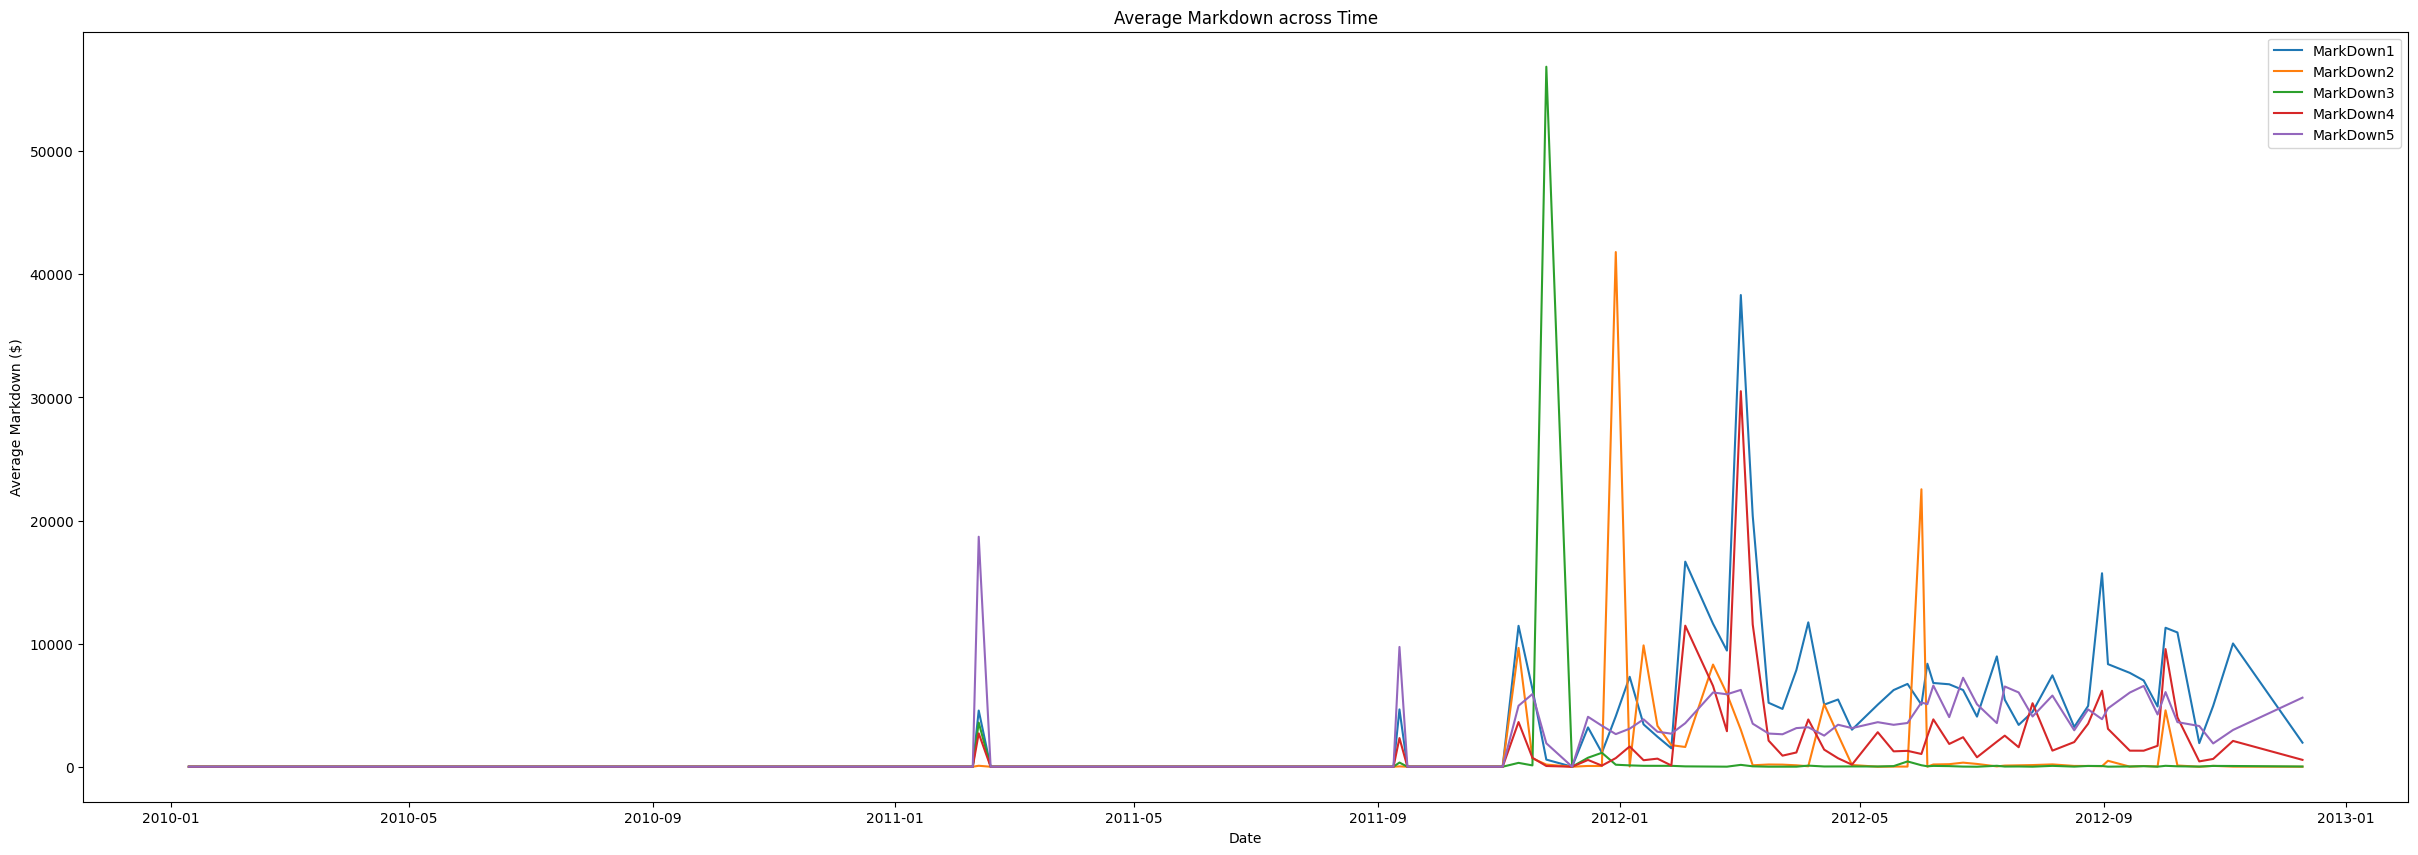

In [24]:
# Average Markdown across time
df_markdown = df_new.groupby('Date').agg({'MarkDown1': 'mean', 'MarkDown2': 'mean', 'MarkDown3': 'mean', 'MarkDown4': 'mean', 'MarkDown5': 'mean'})
plt.figure(figsize = (30,10))

plt.plot(df_markdown.index, df_markdown.MarkDown1, label = 'MarkDown1')
plt.plot(df_markdown.index, df_markdown.MarkDown2, label = 'MarkDown2')
plt.plot(df_markdown.index, df_markdown.MarkDown3, label = 'MarkDown3')
plt.plot(df_markdown.index, df_markdown.MarkDown4, label = 'MarkDown4')
plt.plot(df_markdown.index, df_markdown.MarkDown5, label = 'MarkDown5')


plt.xlabel("Date")
plt.ylabel("Average Markdown ($)")
plt.title("Average Markdown across Time")
plt.legend(loc = 'best')

Text(0.5, 1.0, 'Average Markdown per Month')

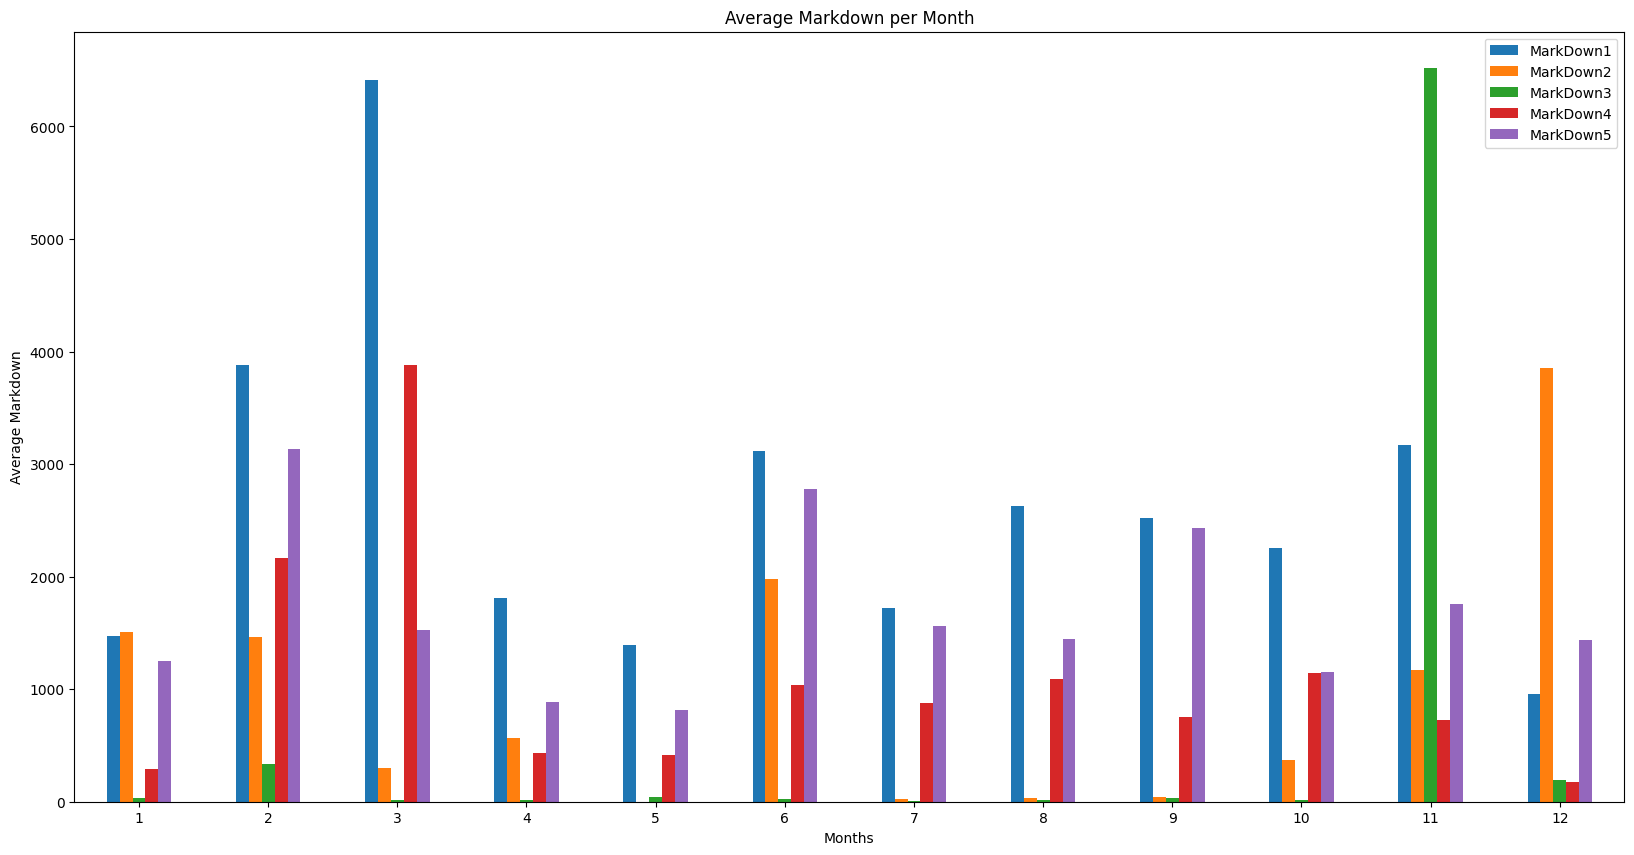

In [25]:
# Markdown across months
df_markdown_month = df_new.groupby(df_new.Date.dt.month).agg({'MarkDown1': 'mean', 'MarkDown2': 'mean', 'MarkDown3': 'mean', 'MarkDown4': 'mean', 'MarkDown5': 'mean'})
df_markdown_month.head()
df_markdown_month.plot(kind = 'bar', figsize = (20,10), rot = 0)
plt.xlabel("Months")
plt.ylabel('Average Markdown')
plt.title('Average Markdown per Month')

# Markdown3 is the highest in November

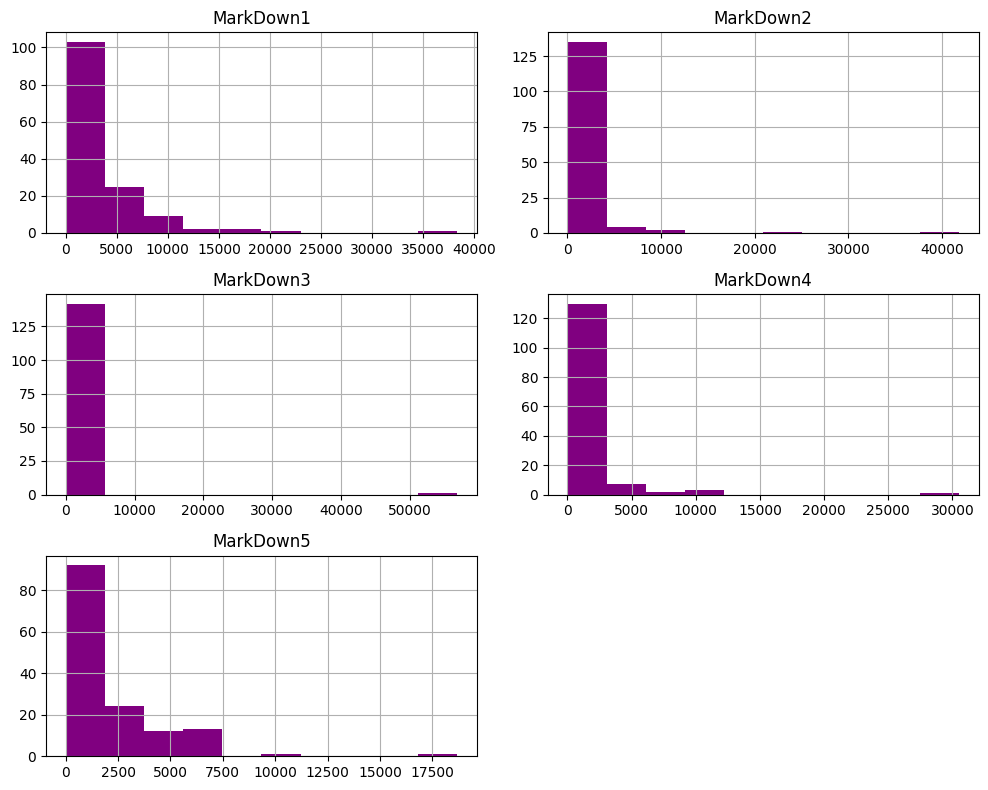

In [26]:
# Frequency of markdown
df_markdown.hist(bins=10, figsize = (10,8), color = 'Purple')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Average Markdown per Type')

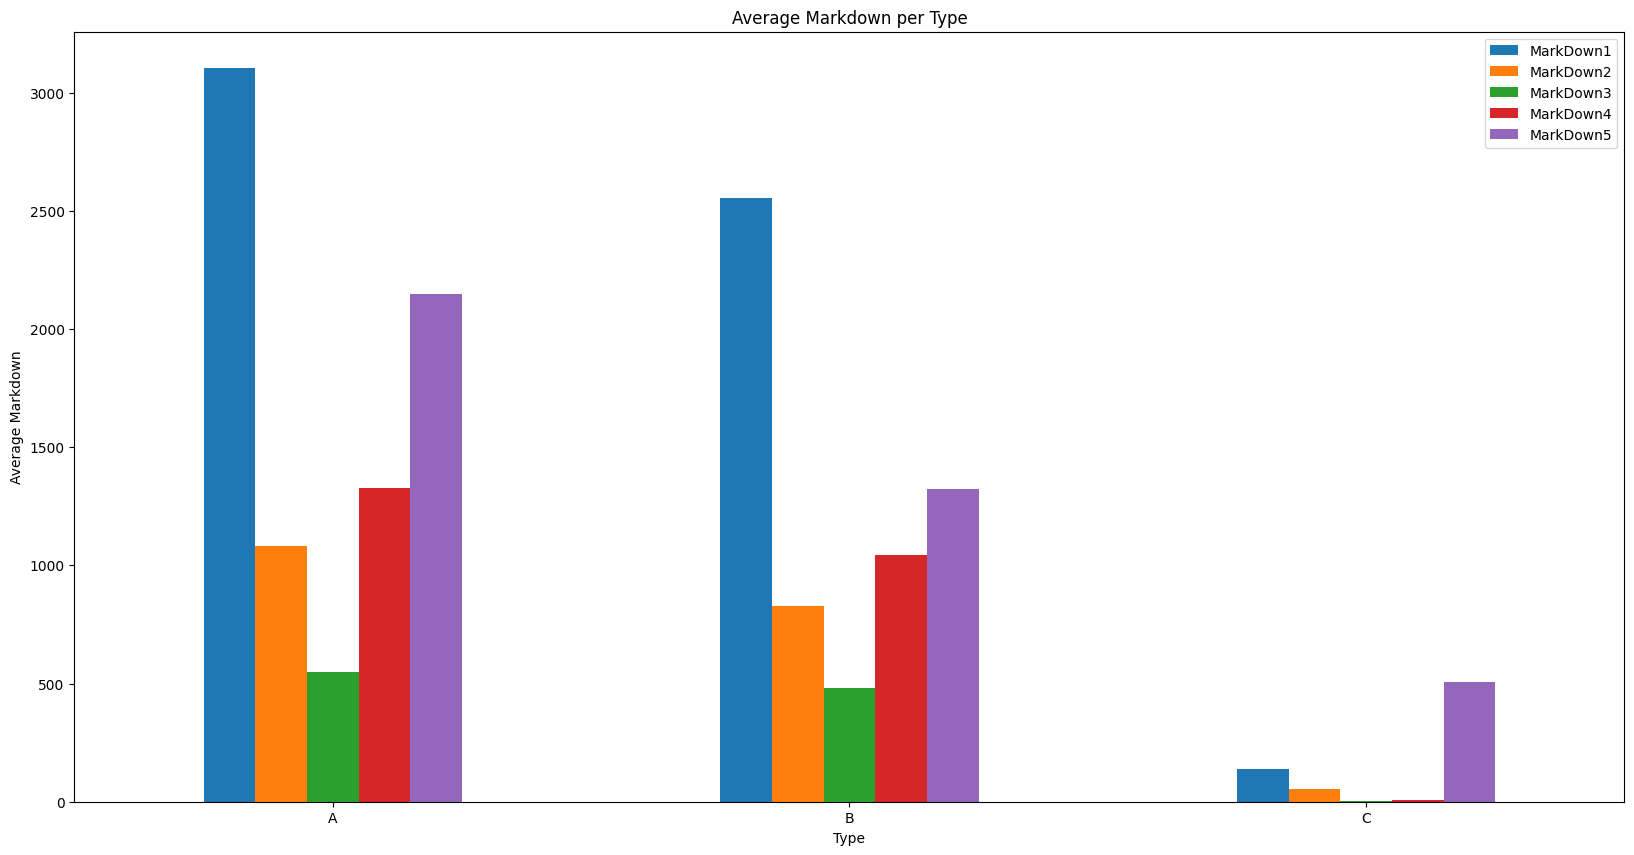

In [27]:
# Markdown across Type
# Markdown across months
df_markdown_type = df_new.groupby(df_new.Type).agg({'MarkDown1': 'mean', 'MarkDown2': 'mean', 'MarkDown3': 'mean', 'MarkDown4': 'mean', 'MarkDown5': 'mean'})
df_markdown_type.head()
df_markdown_type.plot(kind = 'bar', figsize = (20,10), rot = 0)
plt.xlabel("Type")
plt.ylabel('Average Markdown')
plt.title('Average Markdown per Type')

# Markdown1 is the highest in for Type A, B while markdown 5 is the highest for type C

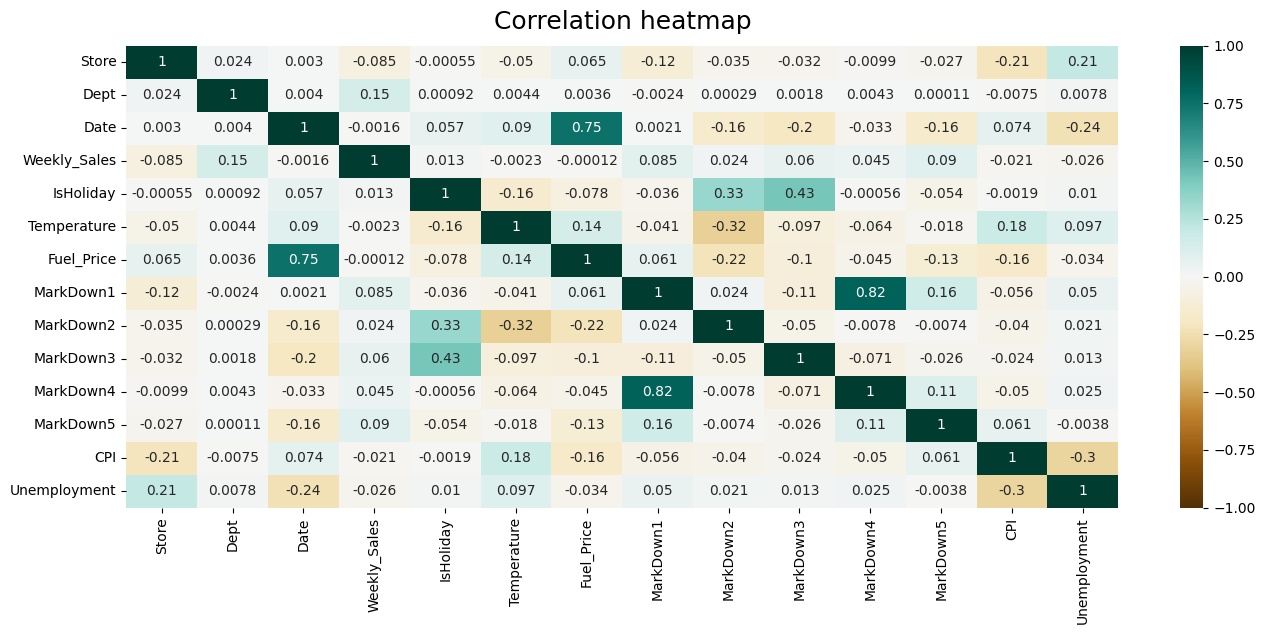

In [28]:
plt.figure(figsize = (16,6))
df_new = pd.DataFrame(df_new)
df_new = df.astype(float, errors = 'ignore')
heatmap = sns.heatmap(df_new.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
heatmap.set_title('Correlation heatmap', fontdict = {'fontsize':18}, pad=12);

In [29]:
data_date = df_new.groupby("Date").agg({"Temperature":"mean"
                                            ,"Fuel_Price":"mean"
                                            ,"IsHoliday":"sum"
                                            ,"CPI":"mean"
                                           ,"Unemployment":"mean"})
data_date = data_date.sort_index()
temp_date_data = data_date[:'2012-12-10']

data_sales_date = sales_df.groupby("Date").agg({"Weekly_Sales":"sum"})
data_sales_date.sort_index(inplace=True)
data_sales_date.Weekly_Sales = data_sales_date.Weekly_Sales/1000000
data_sales_date.Weekly_Sales = data_sales_date.Weekly_Sales.apply(int)
data = pd.merge(data_sales_date, temp_date_data, left_index=True,right_index=True, how='left')
data["IsHoliday"] = data["IsHoliday"].apply(lambda x: True if x == 45.0 else False )

<Axes: title={'center': 'Unemployment'}, xlabel='Date'>

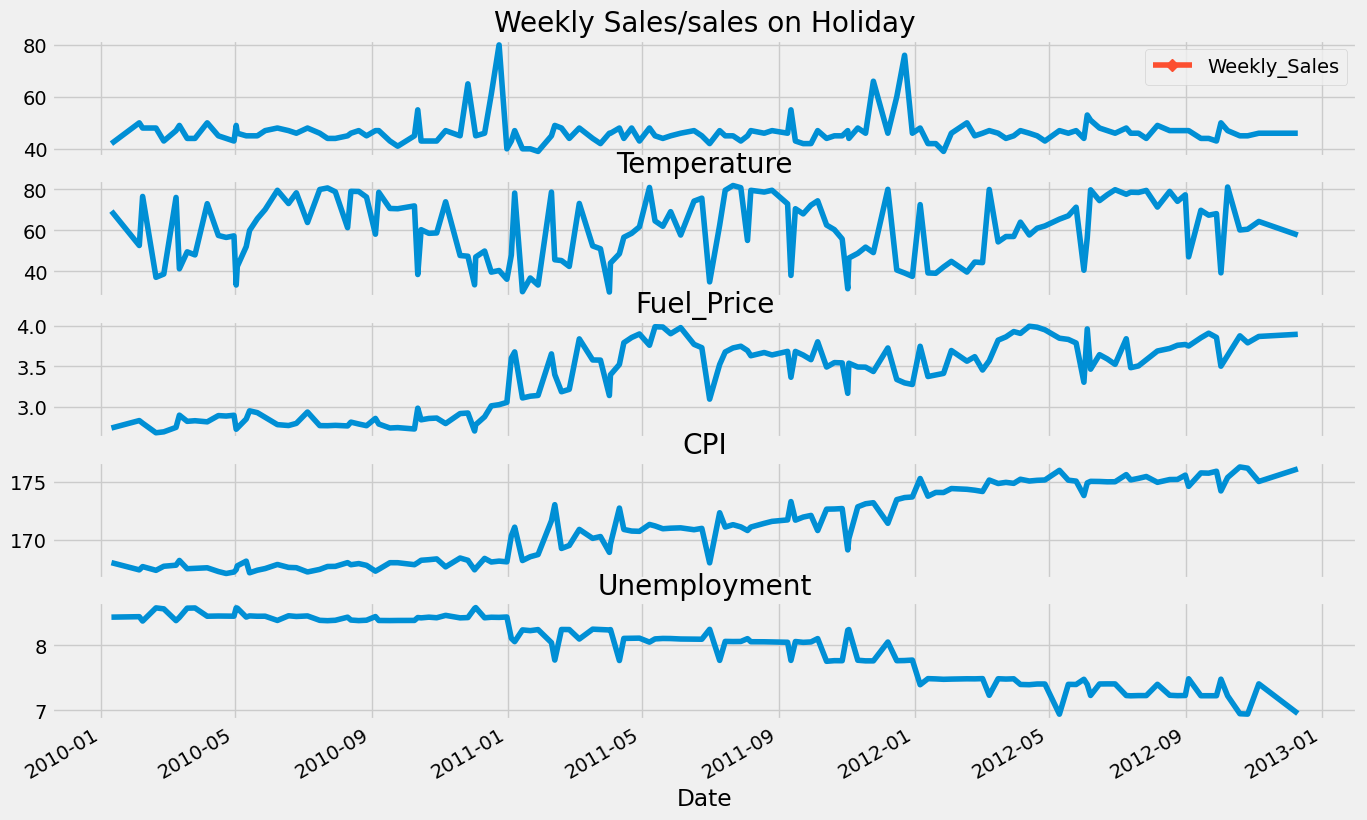

In [30]:
plt.style.use('fivethirtyeight')
#plt.figure(figsize=(15,4))
fig, ax = plt.subplots(5,1,figsize=(15,10),sharex=True)
data["Weekly_Sales"].plot(ax=ax[0],title="Weekly Sales/sales on Holiday")
data[data.IsHoliday==True]["Weekly_Sales"].plot(marker="D",ax=ax[0],legend="Holiday Week sale")
data["Temperature"].plot(ax=ax[1], title="Temperature")
data["Fuel_Price"].plot(ax=ax[2],title="Fuel_Price")
data["CPI"].plot(ax=ax[3],title="CPI")
data["Unemployment"].plot(ax=ax[4],title="Unemployment")

In [31]:
#Merging all the 3 dataset together
sale_store_df = sales_df.merge(store_df, on = 'Store',how='left')
sale_store_df.shape
retail_df = sale_store_df.merge(feature_df, on = ['Store','Date','IsHoliday'],how='left')
retail_df.shape

(421570, 16)

In [32]:
final_df=retail_df.copy()

In [33]:
#Check for missing values
final_df.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Type,0
Size,0
Temperature,0
Fuel_Price,0
MarkDown1,270889


In [34]:
#Check for duplicate rows
final_df.duplicated().sum()

np.int64(0)

In [35]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [36]:
# Convert dates to datetime objects
final_df['Date'] = pd.to_datetime(final_df['Date'],format='%d/%m/%Y')

In [37]:
final_df.describe()

,Store,Dept,Date,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,22.200546,44.260317,2011-06-19 05:35:51.733757184,15981.258123,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
min,1.000000,1.000000,2010-01-10 00:00:00,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2010-10-12 00:00:00,2079.650000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,2012-03-02 00:00:00,20205.852500,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,2012-12-10 00:00:00,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000
std,12.785297,30.492054,NaN,22711.183519,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296


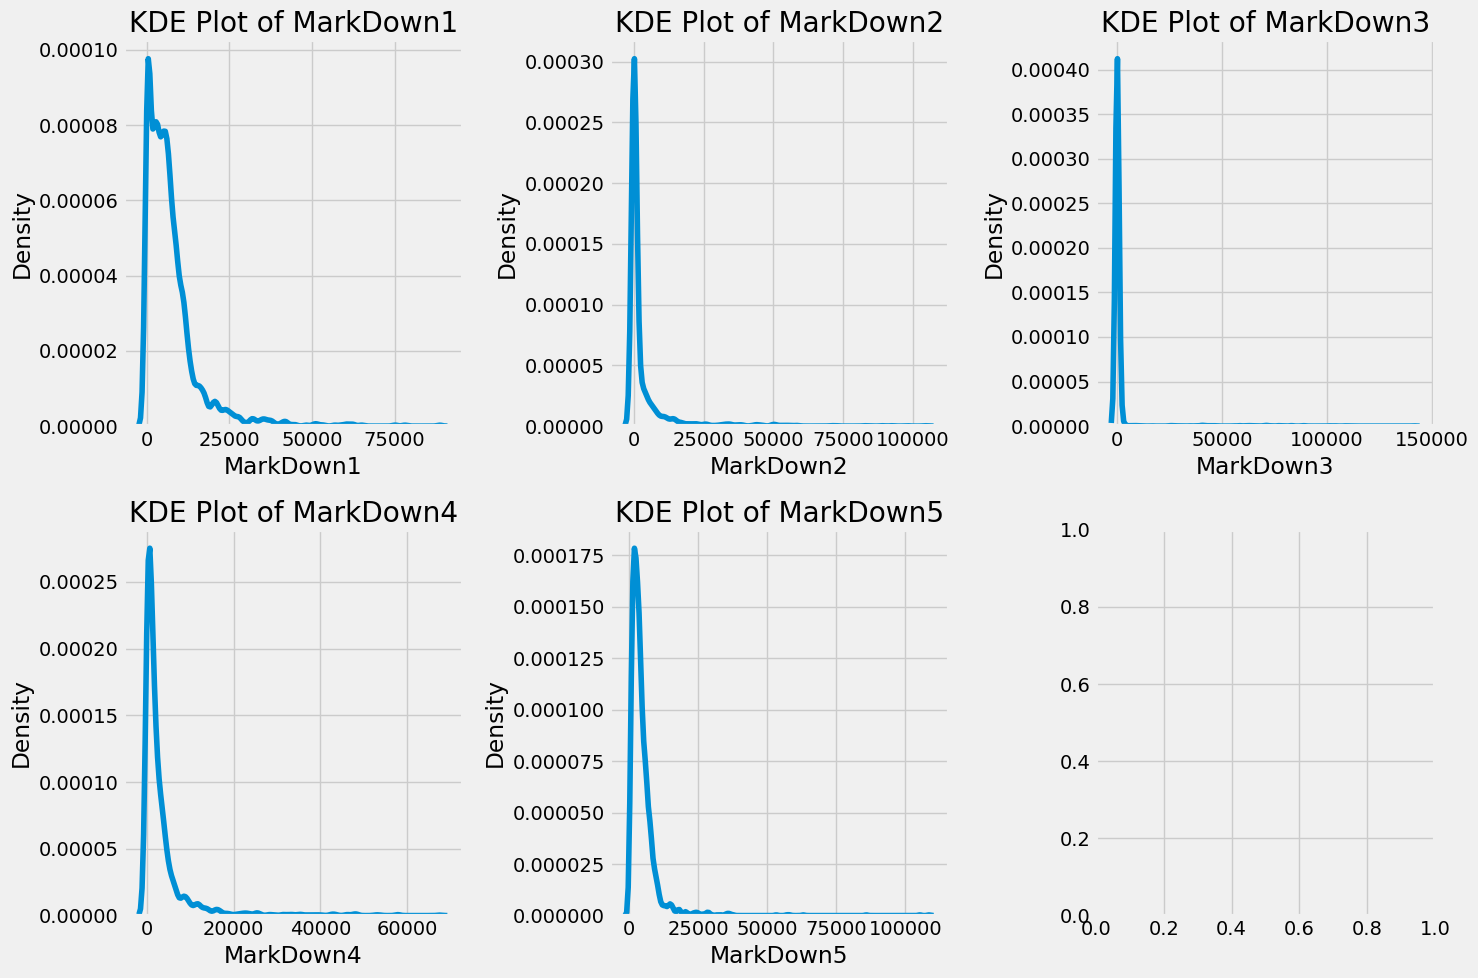

In [38]:
# Define the features for which you want to create violin plots
features = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

# Calculate the number of rows and columns needed
num_features = len(features)
num_rows = num_features // 2
num_cols = 2 if num_features % 2 == 0 else 3  # Adjust for odd number of features

# Set up subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Flatten the axes array if needed
if num_rows > 1:
    axes = axes.flatten()

# Iterate over each feature and create a kde plot on its respective subplot
for i, feature in enumerate(features):
    sns.kdeplot(data=final_df, x=feature, ax=axes[i])
    axes[i].set_title(f'KDE Plot of {feature}')
    axes[i].set_xlabel(feature)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Calculate the number of rows and columns needed
num_features = len(features)
num_rows = num_features // 2
num_cols = 2 if num_features % 2 == 0 else 3  # Adjust for odd number of features

# Set up subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Flatten the axes array if needed
if num_rows > 1:
    axes = axes.flatten()

# Iterate over each feature and create a histogram plot on its respective subplot
for i, feature in enumerate(features):
    sns.histplot(data=final_df, x=feature,kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram Plot of {feature}')
    axes[i].set_xlabel(feature)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Define the features for which you want to create violin plots
features = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

# Calculate the number of rows and columns needed
num_features = len(features)
num_rows = num_features // 2
num_cols = 2 if num_features % 2 == 0 else 3  # Adjust for odd number of features

# Set up subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Flatten the axes array if needed
if num_rows > 1:
    axes = axes.flatten()

# Iterate over each feature and create a violin plot on its respective subplot
for i, feature in enumerate(features):
    sns.violinplot(data=final_df, x=feature, ax=axes[i])
    axes[i].set_title(f'Violin Plot of {feature}')
    axes[i].set_xlabel(feature)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Step 1: Handle Missing Values (Impute with Mean)
median_markdown1 = final_df['MarkDown1'].median()
median_markdown2 = final_df['MarkDown2'].median()
median_markdown3 = final_df['MarkDown3'].median()
median_markdown4 = final_df['MarkDown4'].median()
median_markdown5 = final_df['MarkDown5'].median()

final_df['MarkDown1'].fillna(median_markdown1, inplace=True)
final_df['MarkDown2'].fillna(median_markdown2, inplace=True)
final_df['MarkDown3'].fillna(median_markdown3, inplace=True)
final_df['MarkDown4'].fillna(median_markdown4, inplace=True)
final_df['MarkDown5'].fillna(median_markdown5, inplace=True)





In [ ]:
final_df.isnull().sum()

In [ ]:
# Define the features for which you want to create violin plots
features = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

# Calculate the number of rows and columns needed
num_features = len(features)
num_rows = num_features // 2
num_cols = 2 if num_features % 2 == 0 else 3  # Adjust for odd number of features

# Set up subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Flatten the axes array if needed
if num_rows > 1:
    axes = axes.flatten()

# Iterate over each feature and create a kde plot on its respective subplot
for i, feature in enumerate(features):
    sns.kdeplot(data=final_df, x=feature, ax=axes[i])
    axes[i].set_title(f'KDE Plot of {feature}')
    axes[i].set_xlabel(feature)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Calculate the number of rows and columns needed
num_features = len(features)
num_rows = num_features // 2
num_cols = 2 if num_features % 2 == 0 else 3  # Adjust for odd number of features

# Set up subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Flatten the axes array if needed
if num_rows > 1:
    axes = axes.flatten()

# Iterate over each feature and create a histogram plot on its respective subplot
for i, feature in enumerate(features):
    sns.histplot(data=final_df, x=feature,kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram Plot of {feature}')
    axes[i].set_xlabel(feature)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Define the features for which you want to create violin plots
features = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

# Calculate the number of rows and columns needed
num_features = len(features)
num_rows = num_features // 2
num_cols = 2 if num_features % 2 == 0 else 3  # Adjust for odd number of features

# Set up subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Flatten the axes array if needed
if num_rows > 1:
    axes = axes.flatten()

# Iterate over each feature and create a violin plot on its respective subplot
for i, feature in enumerate(features):
    sns.violinplot(data=final_df, x=feature, ax=axes[i])
    axes[i].set_title(f'Violin Plot of {feature}')
    axes[i].set_xlabel(feature)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Step 2: Normalize Sales Data (Standardization)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Reshape the column to a 2D array and apply min-max scaling
final_df['Weekly_Sales_normalized'] = scaler.fit_transform(final_df['Weekly_Sales'].values.reshape(-1, 1))

In [ ]:
final_df['Sales_sqrt'] = final_df['Weekly_Sales_normalized'].apply(lambda x: x ** 0.5)

In [ ]:
final_df.head(2)

In [ ]:
final_df.isnull().sum()

In [ ]:
from scipy.stats import skew

# Calculate skewness of a column 'data_column'
skewness = skew(final_df['Sales_sqrt'])
print("Skewness:", skewness)

In [ ]:
# Calculate the number of rows and columns needed
features=['Weekly_Sales','Weekly_Sales_normalized','Sales_sqrt']
num_features = len(features)
num_rows = num_features // 2
num_cols = 2 if num_features % 2 == 0 else 3  # Adjust for odd number of features

# Set up subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 10))

# Flatten the axes array if needed
if num_rows > 1:
    axes = axes.flatten()

# Iterate over each feature and create a histogram plot on its respective subplot
for i, feature in enumerate(features):
    sns.histplot(data=final_df, x=feature,kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram Plot of {feature}')
    axes[i].set_xlabel(feature)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a sample dataset


# Plot the distribution of the data
plt.hist(final_df['Weekly_Sales'])
plt.xlabel("Value")
plt.ylabel("Number of data points")
plt.title("Distribution of skewed data")
plt.show()




# Plot the distribution of the square root transformed data
plt.hist(final_df['Sales_sqrt'])
plt.xlabel("Value")
plt.ylabel("Number of data points")
plt.title("Distribution of square root transformed data")
plt.show()



In [ ]:
import numpy as np

# Calculate mean and standard deviation
mean_sales = np.mean(final_df['Sales_sqrt'])
std_deviation = np.std(final_df['Sales_sqrt'])

# Set a threshold for flagging anomalies (e.g., 3 standard deviations from the mean)
threshold = mean_sales + 3 * std_deviation

# Identify anomalies
anomalies = [data_point for data_point in final_df['Sales_sqrt'] if data_point > threshold]

#If the data point exceeds the threshold, it assigns a value of 1 (indicating an anomaly), otherwise it assigns a value of 0.
final_df['Anomaly'] = [1 if data_point > threshold else 0 for data_point in final_df['Sales_sqrt']]

print("Retail Weekly Sales Data:")
print("Mean Sales:", mean_sales)
print("Standard Deviation:", std_deviation)
print("Anomalies (2 standard deviations from the mean)-Total number of Anomalies in Weekly Sales :", len(anomalies))
print("Total number of Anomalies in Weekly Sales (percentage-wise) :", round((len(anomalies)/len(sales_df))*100,2))

In [ ]:
#Flagged anomalies in Sales dataset

print("Anomalies in Weekly_Sales:",final_df[final_df['Anomaly']==1].shape[0])


In [ ]:
final_df.head()

In [ ]:
final_df['Anomaly'].value_counts()

In [ ]:
# Set the figure size
plt.figure(figsize=(20, 10))  # Width = 40 inches, Height = 10 inches

# Create line plot
ax=sns.barplot(final_df['Anomaly'].value_counts())

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')
# Adding title and labels
plt.title('Weekly_Sales_Anomaly')
plt.xlabel('Anamolies')
plt.ylabel('Count')

# Show the plot
plt.show()

In [ ]:
len(final_df[(final_df['Anomaly']==1) & (final_df['Unemployment']>=final_df['Unemployment'].mean())])*100/len(final_df[(final_df['Anomaly']==1)])

In [ ]:
len(final_df[(final_df['Anomaly']==1) & (final_df['Unemployment']<=final_df['Unemployment'].mean())])*100/len(final_df[(final_df['Anomaly']==1)])

In [ ]:
len(final_df[(final_df['Anomaly']==1) & (final_df['CPI']>=final_df['CPI'].mean())])*100/len(final_df[(final_df['Anomaly']==1)])

In [ ]:
len(final_df[(final_df['Anomaly']==1) & (final_df['CPI']<=final_df['CPI'].mean())])*100/len(final_df[(final_df['Anomaly']==1)])

In [ ]:
len(final_df[(final_df['Anomaly']==1) & (final_df['Fuel_Price']>=final_df['Fuel_Price'].mean())])*100/len(final_df[(final_df['Anomaly']==1)])

In [ ]:
len(final_df[(final_df['Anomaly']==1) & (final_df['Fuel_Price']<=final_df['Fuel_Price'].mean())])*100/len(final_df[(final_df['Anomaly']==1)])

In [ ]:
len(final_df[(final_df['Anomaly']==1) & (final_df['Temperature']>=final_df['Temperature'].mean())])*100/len(final_df[(final_df['Anomaly']==1)])

In [ ]:
len(final_df[(final_df['Anomaly']==1) & (final_df['Temperature']<=final_df['Temperature'].mean())])*100/len(final_df[(final_df['Anomaly']==1)])

In [ ]:
len(final_df[(final_df['Anomaly']==1) & (final_df['Size']>=final_df['Size'].mean())])*100/len(final_df[(final_df['Anomaly']==1)])

In [ ]:
len(final_df[(final_df['Anomaly']==1) & (final_df['Size']<=final_df['Size'].mean())])*100/len(final_df[(final_df['Anomaly']==1)])

In [ ]:
len(final_df[(final_df['Anomaly']==1) & (final_df['IsHoliday']==True)])*100/len(final_df[(final_df['Anomaly']==1)])


In [ ]:
len(final_df[(final_df['Anomaly']==1) & (final_df['IsHoliday']==False)])*100/len(final_df[(final_df['Anomaly']==1)])

In [ ]:
len(final_df[(final_df['Anomaly']==1) & (final_df['MarkDown1']>=final_df['MarkDown1'].mean())])*100/len(final_df[(final_df['Anomaly']==1)])

In [ ]:
len(final_df[(final_df['Anomaly']==1) & (final_df['MarkDown1']<=final_df['MarkDown1'].mean())])*100/len(final_df[(final_df['Anomaly']==1)])

In [ ]:
len(final_df[(final_df['Anomaly']==1) & (final_df['MarkDown2']>=final_df['MarkDown2'].mean())])*100/len(final_df[(final_df['Anomaly']==1)])

In [ ]:
len(final_df[(final_df['Anomaly']==1) & (final_df['MarkDown2']<=final_df['MarkDown2'].mean())])*100/len(final_df[(final_df['Anomaly']==1)])

In [ ]:
len(final_df[(final_df['Anomaly']==1) & (final_df['MarkDown3']>=final_df['MarkDown3'].mean())])*100/len(final_df[(final_df['Anomaly']==1)])

In [ ]:
len(final_df[(final_df['Anomaly']==1) & (final_df['MarkDown3']<=final_df['MarkDown3'].mean())])*100/len(final_df[(final_df['Anomaly']==1)])

In [ ]:
len(final_df[(final_df['Anomaly']==1) & (final_df['MarkDown4']>=final_df['MarkDown4'].mean())])*100/len(final_df[(final_df['Anomaly']==1)])

In [ ]:
len(final_df[(final_df['Anomaly']==1) & (final_df['MarkDown4']<=final_df['MarkDown4'].mean())])*100/len(final_df[(final_df['Anomaly']==1)])

In [ ]:
len(final_df[(final_df['Anomaly']==1) & (final_df['MarkDown5']>=final_df['MarkDown5'].mean())])*100/len(final_df[(final_df['Anomaly']==1)])

In [ ]:
len(final_df[(final_df['Anomaly']==1) & (final_df['MarkDown5']<=final_df['MarkDown5'].mean())])*100/len(final_df[(final_df['Anomaly']==1)])

In [ ]:
df_anomalies=final_df[(final_df['Anomaly']==1)].reset_index(drop=True)
df_anomalies.head()

In [ ]:
# Set the figure size
plt.figure(figsize=(20, 10))  # Width = 20 inches, Height = 10 inches

# Create the bar plot
ax = sns.scatterplot(x='Size', y='Sales_sqrt',hue='Anomaly', data=final_df)

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

# Adding title and labels
plt.title('CPI-wise Weekly Sales Anamolies')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')

# Show the plot
plt.show()

In [ ]:
# Set the figure size
plt.figure(figsize=(20, 10))  # Width = 20 inches, Height = 10 inches

# Create the bar plot
ax = sns.scatterplot(x='CPI', y='Sales_sqrt',hue='Anomaly', data=final_df)

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

# Adding title and labels
plt.title('CPI-wise Weekly Sales Anamolies')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')

# Show the plot
plt.show()

In [ ]:
# Set the figure size
plt.figure(figsize=(20, 10))  # Width = 20 inches, Height = 10 inches

# Create the bar plot
ax = sns.scatterplot(x='Unemployment', y='Weekly_Sales', hue='Anomaly', data=final_df)

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

# Adding title and labels
plt.title('Unemployment-wise Weekly Sales Anamolies')
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')

# Show the plot
plt.show()

In [ ]:
# Set the figure size
plt.figure(figsize=(20, 10))  # Width = 20 inches, Height = 10 inches

# Create the bar plot
ax = sns.scatterplot(x='Fuel_Price', y='Weekly_Sales',hue='Anomaly', data=final_df)

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

# Adding title and labels
plt.title('Fuel_Price-wise Weekly Sales Anamolies')
plt.xlabel('Fuel_Price')
plt.ylabel('Weekly Sales')

# Show the plot
plt.show()

In [ ]:
# Set the figure size
plt.figure(figsize=(20, 10))  # Width = 20 inches, Height = 10 inches

# Create the bar plot
ax = sns.scatterplot(x='Temperature', y='Weekly_Sales',hue='Anomaly', data=final_df)

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

# Adding title and labels
plt.title('Temperature-wise Weekly Sales Anamolies')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')

# Show the plot
plt.show()

In [ ]:
# Set the figure size
plt.figure(figsize=(20, 10))  # Width = 20 inches, Height = 10 inches

# Create the bar plot
ax = sns.lineplot(x='Date', y='Weekly_Sales', hue='Anomaly', data=final_df)

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

# Adding title and labels
plt.title('Date-wise Weekly Sales Anamolies')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')

# Show the plot
plt.show()

In [ ]:
# Set the figure size
plt.figure(figsize=(40, 10))  # Width = 40 inches, Height = 10 inches

# Create the bar plot
ax=sns.barplot(x='Dept', y='Weekly_Sales', data=df_anomalies)

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

# Adding title and labels
plt.title('Department Weekly Sales')
plt.xlabel('Department')
plt.ylabel('Weekly Sales')

# Show the plot
plt.show()

In [ ]:
# Set the figure size
plt.figure(figsize=(40, 10))  # Width = 40 inches, Height = 10 inches

# Create the bar plot
ax=sns.barplot(x='Store', y='Weekly_Sales', data=df_anomalies)

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

# Add a line plot
#sns.lineplot(x='Store', y='Weekly_Sales', data=df_anomalies,color='red')

# Adding title and labels
plt.title('Stores Weekly Sales')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')

# Show the plot
plt.show()


In [ ]:
# Set the figure size
plt.figure(figsize=(20, 10))  # Width = 20 inches, Height = 10 inches

# Create the bar plot
ax = sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df_anomalies)

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

# Adding title and labels
plt.title('IsHoliday Weekly Sales Anamolies')
plt.xlabel('Anamoly')
plt.ylabel('Weekly Sales')

# Show the plot
plt.show()

In [ ]:
# Define the features for which you want to create violin plots
features = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5','CPI','Unemployment','Store']

# Calculate the number of rows and columns needed
num_features = len(features)
num_rows = num_features // 2
num_cols = 2 if num_features % 2 == 0 else 3  # Adjust for odd number of features

# Set up subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Flatten the axes array if needed
if num_rows > 1:
    axes = axes.flatten()

# Iterate over each feature and create a kde plot on its respective subplot
for i, feature in enumerate(features):
    sns.boxplot(x='Anomaly', y=feature, data=final_df, ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')
    axes[i].set_xlabel("Is_Anamoly")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Define the features for which you want to create violin plots
features = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5','CPI','Unemployment','Store']

# Calculate the number of rows and columns needed
num_features = len(features)
num_rows = num_features // 2
num_cols = 2 if num_features % 2 == 0 else 3  # Adjust for odd number of features

# Set up subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Flatten the axes array if needed
if num_rows > 1:
    axes = axes.flatten()

# Iterate over each feature and create a kde plot on its respective subplot
for i, feature in enumerate(features):
    sns.violinplot(x='Anomaly', y=feature, data=final_df, ax=axes[i])
    axes[i].set_title(f'Violin Plot of {feature}')
    axes[i].set_xlabel("Is_Anamoly")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Define the features for which you want to create bar plots
features = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5','CPI','Unemployment','Store']

# Calculate the number of rows and columns needed
num_features = len(features)
num_rows = num_features // 2
num_cols = 2 if num_features % 2 == 0 else 3  # Adjust for odd number of features

# Set up subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Flatten the axes array if needed
if num_rows > 1:
    axes = axes.flatten()

# Iterate over each feature and create a kde plot on its respective subplot
for i, feature in enumerate(features):
    ax1=sns.barplot(x='Anomaly', y=feature, data=final_df, ax=axes[i])
    axes[i].set_title(f'Bar Plot of {feature}')
    axes[i].set_xlabel("Is_Anamoly")


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Define the features for which you want to create point plots
features = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5','CPI','Unemployment','Store']

# Calculate the number of rows and columns needed
num_features = len(features)
num_rows = num_features // 2
num_cols = 2 if num_features % 2 == 0 else 3  # Adjust for odd number of features

# Set up subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Flatten the axes array if needed
if num_rows > 1:
    axes = axes.flatten()

# Iterate over each feature and create a kde plot on its respective subplot
for i, feature in enumerate(features):
    ax1=sns.pointplot(x='Anomaly', y=feature, data=final_df, ax=axes[i])
    axes[i].set_title(f'Point Plot of {feature}')
    axes[i].set_xlabel("Is_Anamoly")


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Define the features for which you want to create kde plots
features = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5','CPI','Unemployment','Store']

# Calculate the number of rows and columns needed
num_features = len(features)
num_rows = num_features // 2
num_cols = 2 if num_features % 2 == 0 else 3  # Adjust for odd number of features

# Set up subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Flatten the axes array if needed
if num_rows > 1:
    axes = axes.flatten()

# Iterate over each feature and create a kde plot on its respective subplot
for i, feature in enumerate(features):
    ax1=sns.stripplot(x='Anomaly', y=feature, data=final_df, ax=axes[i])
    axes[i].set_title(f'Strip Plot of {feature}')
    axes[i].set_xlabel("Is_Anamoly")


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
final_df.head(1)

In [ ]:
#Anamoly detection
from sklearn.ensemble import IsolationForest
#checking for normal distribution
print("Skewness - Cost: %f" % final_df['Weekly_Sales'].skew())
print("Kurtosis - Cost: %f" % final_df['Weekly_Sales'].kurt())

In [ ]:
#plotting graph for cost
plt.scatter(range(final_df.shape[0]), np.sort(final_df['Weekly_Sales'].values))
plt.xlabel('index')
plt.ylabel('Weekly_Sales')
plt.title("Weekly_Sales distribution")
sns.despine()

In [ ]:
#distribution of cost
sns.distplot(final_df['Weekly_Sales'])
plt.title("Distribution of Weekly Sales")
sns.despine()

In [ ]:
#distribution of cost
sns.distplot(final_df['Sales_sqrt'])
plt.title("Distribution of Weekly Sales")
sns.despine()

In [ ]:
#isolation forest for anamoly detection on Weekly Sales
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(final_df['Weekly_Sales'].values.reshape(-1, 1))
final_df['anomaly_score_univariate_Weekly_Sales'] = isolation_forest.decision_function(final_df['Weekly_Sales'].values.reshape(-1, 1))
final_df['outlier_univariate_Weekly_Sales'] = isolation_forest.predict(final_df['Weekly_Sales'].values.reshape(-1, 1))


In [ ]:
#chart to visualize outliers
xx = np.linspace(final_df['Weekly_Sales'].min(), final_df['Weekly_Sales'].max(), len(final_df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
where=outlier==-1, color='r',
alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Weekly Sales')
plt.show();

In [ ]:
# Handling Outliers & Outlier treatments
# To separate the symmetric distributed features and skew symmetric distributed features
num_columns=['Weekly_Sales', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment']
symmetric_feature=[]
non_symmetric_feature=[]
for i in num_columns:
  if abs(final_df[i].mean()-final_df[i].median())< 0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

In [ ]:
# For Skew Symmetric features defining upper and lower boundry
#Outer Fence
def outlier_treatment_skew(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)- 1.5*IQR
  upper_bridge =df[feature].quantile(0.75)+ 1.5*IQR
  # print(f'upper : {upper_bridge} lower : {lower_bridge}')
  return upper_bridge,lower_bridge

In [ ]:
final_df.describe()

In [ ]:
final_df.shape

In [ ]:
# Get the upper and lower boundaries for 'Weekly_Sales'
upper_boundary, lower_boundary = outlier_treatment_skew(final_df, 'Weekly_Sales')


In [ ]:
upper_boundary, lower_boundary

In [ ]:
#Removing Anomalies using IQR
final_new_df=final_df[(final_df['Weekly_Sales'] >= lower_boundary) & (final_df['Weekly_Sales'] <= upper_boundary)]

In [ ]:
#chart to visualize outliers
xx = np.linspace(final_new_df['Weekly_Sales'].min(), final_new_df['Weekly_Sales'].max(), len(final_new_df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
where=outlier==-1, color='r',
alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Weekly Sales')
plt.show();

In [ ]:
import numpy as np

# Calculate mean and standard deviation
mean_sales = np.mean(final_new_df['Sales_sqrt'])
std_deviation = np.std(final_new_df['Sales_sqrt'])

# Set a threshold for flagging anomalies (e.g., 3 standard deviations from the mean)
threshold = mean_sales + 3 * std_deviation

# Identify anomalies
anomalies = [data_point for data_point in final_new_df['Sales_sqrt'] if data_point > threshold]

#If the data point exceeds the threshold, it assigns a value of 1 (indicating an anomaly), otherwise it assigns a value of 0.
final_df['Anomaly'] = [1 if data_point > threshold else 0 for data_point in final_df['Sales_sqrt']]

print("Retail Weekly Sales Data:")
print("Mean Sales:", mean_sales)
print("Standard Deviation:", std_deviation)
print("Anomalies (2 standard deviations from the mean)-Total number of Anomalies in Weekly Sales :", len(anomalies))
print("Total number of Anomalies in Weekly Sales (percentage-wise) :", round((len(anomalies)/len(sales_df))*100,2))